# Projeto 2 - Ciência dos Dados

Grupo: Guilherme Ricchetti Carvalho, Keiya Nishio, Lucas Gabriel Mocellin Teixeira e Matheus Marques Venturi.


Turma: C

### Importando bibliotecas

In [88]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Proposta

Classificar a comestibilidade (comestível ou venenoso) de um cogumelo com base em características morfológicas e ecológicas.

Dataset disponível no seguinte link: https://www.kaggle.com/uciml/mushroom-classification

# Carregando Dados

In [89]:
import os

filename = 'mushrooms.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo mushrooms.csv, tudo certo para prosseguir com o projeto!


In [90]:
dataset=pd.read_csv(filename)
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [91]:
#dataset=dataset.dropna()  # Remover linhas com colunas vazias (NaN)  -- não precisou

### Tradução do dataset para português

Nas próximas duas células, foi feita uma adaptação do dataset para a língua portuguesa, de modo a permitir uma melhor interpretação dos dados.

In [92]:
dataset = dataset.rename(columns = 
                     {'class': 'classe',
                      'cap-shape': 'formato-chapéu', 
                      'cap-surface': 'superfície-chapéu',
                      'cap-color': 'cor-chapéu',
                      'bruises': 'hematomas',
                      'odor': 'odor',
                      'gill-attachment': 'ligação-lamela',
                      'gill-spacing': 'espaçamento-lamela',
                      'gill-size': 'tamanho-lamela',
                      'gill-color': 'cor-lamela',
                      'stalk-shape': 'formato-estipe',
                      'stalk-root': 'raiz-estipe',
                      'stalk-surface-above-ring': 'superfície-estipe-sobre-anel',
                      'stalk-surface-below-ring': 'superfície-estipe-sob-anel',
                      'stalk-color-above-ring': 'cor-estipe-sobre-anel',
                      'stalk-color-below-ring': 'cor-estipe-sob-anel',
                      'veil-type': 'tipo-volva',
                      'veil-color': 'cor-volva',
                      'ring-number': 'quantidade-anéis',
                      'ring-type': 'tipo-anel',
                      'spore-print-color': 'cor-impressão-esporo',
                      'population': 'população',
                      'habitat': 'habitat'}, inplace = False)

In [93]:
dataset['classe']=dataset['classe'].astype('category')
dataset['classe'].cat.categories = ['comestível', 'venenoso']

dataset['formato-chapéu']=dataset['formato-chapéu'].astype('category')
dataset['formato-chapéu'].cat.categories = ['sino', 'cone', 'reto', 'nodoso', 'afundado', 'convexo']

dataset['superfície-chapéu']=dataset['superfície-chapéu'].astype('category')
dataset['superfície-chapéu'].cat.categories = ['fibroso', 'ranhuras', 'liso', 'escamoso']
 
dataset['cor-chapéu']=dataset['cor-chapéu'].astype('category')
dataset['cor-chapéu'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'rosa', 'verde', 'roxo', 'branco', 'amarelo']

dataset['hematomas']=dataset['hematomas'].astype('category')
dataset['hematomas'].cat.categories = ['não tem' , 'tem']

dataset['odor']=dataset['odor'].astype('category')
dataset['odor'].cat.categories = ['amêndoa', 'creosote', 'podre', 'anis', 'mofado', 'nenhum', 'pungente', 'picante', 'peixe']

dataset['ligação-lamela']=dataset['ligação-lamela'].astype('category')
dataset['ligação-lamela'].cat.categories = ['conectada', 'solta']

dataset['espaçamento-lamela']=dataset['espaçamento-lamela'].astype('category')
dataset['espaçamento-lamela'].cat.categories = ['perto', 'lotado']

dataset['tamanho-lamela']=dataset['tamanho-lamela'].astype('category')
dataset['tamanho-lamela'].cat.categories = ['ampla', 'estreita']

dataset['cor-lamela']=dataset['cor-lamela'].astype('category')
dataset['cor-lamela'].cat.categories = ['couro', 'vermelha', 'cinza', 'chocolate', 'preta', 'marrom', 'laranja', 'rosa', 'verde', 'roxa', 'branca', 'amarelo']

dataset['formato-estipe']=dataset['formato-estipe'].astype('category')
dataset['formato-estipe'].cat.categories = ['alargando', 'afunilando']
    
dataset['raiz-estipe']=dataset['raiz-estipe'].astype('category')
dataset['raiz-estipe'].cat.categories = ['não tem', 'bulboso', 'clava', 'reto', 'enraizado']

dataset['superfície-estipe-sobre-anel']=dataset['superfície-estipe-sobre-anel'].astype('category')
dataset['superfície-estipe-sobre-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['superfície-estipe-sob-anel']=dataset['superfície-estipe-sob-anel'].astype('category')
dataset['superfície-estipe-sob-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['cor-estipe-sobre-anel']=dataset['cor-estipe-sobre-anel'].astype('category')
dataset['cor-estipe-sobre-anel'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['cor-estipe-sob-anel']=dataset['cor-estipe-sob-anel'].astype('category')
dataset['cor-estipe-sob-anel']. cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['tipo-volva']=dataset['tipo-volva'].astype('category')
dataset['tipo-volva'].cat.categories = ['parcial']

dataset['cor-volva']=dataset['cor-volva'].astype('category')
dataset['cor-volva'].cat.categories = ['marrom' , 'laranja', 'branco', 'amarelo']

dataset['quantidade-anéis']=dataset['quantidade-anéis'].astype('category')
dataset['quantidade-anéis'].cat.categories = ['nenhum' , 'um', 'dois']

dataset['tipo-anel']=dataset['tipo-anel'].astype('category')
dataset['tipo-anel'].cat.categories = ['evanescente', 'deslumbrante', 'grande', 'nenhum', 'pingente']

dataset['cor-impressão-esporo']=dataset['cor-impressão-esporo'].astype('category')
dataset['cor-impressão-esporo'].cat.categories = ['couro', 'chocolate', 'preto', 'marrom', 'laranja', 'verde', 'roxo', 'branco', 'amarelo']

dataset['população']=dataset['população'].astype('category')
dataset['população'].cat.categories=['abundante', 'aglomerado', 'numeroso', 'espalhado', 'diverso', 'solitário']

dataset['habitat']=dataset['habitat'].astype('category')
dataset['habitat'].cat.categories=['madeira', 'gramínea', 'folha', 'pradaria', 'trilha', 'urbano', 'lixo']

In [94]:
train, test = train_test_split(dataset, test_size=0.25, random_state=1)  # separar dataset em treinamento e teste

Separando a base de treinamento em duas (cogumelos venenosos e cogumelos comestíveis):

In [95]:
venenoso=train.loc[train['classe']=='venenoso', :]
comestível=train.loc[train['classe']=='comestível', :]

# Classificador Random Forest

Esta seção é destinada à aplicação do modelo de classificação Random Forest. Esse modelo utiliza a base treinamento (separada a partir do dataset) para prever a classe de um dado cogumelo.

### Funcionamento do Classificador

### Aplicação do Classificador

In [96]:
colunas_feature = list(train.columns)
colunas_feature.remove('classe')

X = train.loc[:, colunas_feature]
X = pd.get_dummies(X)
X.head()

,formato-chapéu_sino,formato-chapéu_cone,formato-chapéu_reto,formato-chapéu_nodoso,formato-chapéu_afundado,formato-chapéu_convexo,superfície-chapéu_fibroso,superfície-chapéu_ranhuras,superfície-chapéu_liso,superfície-chapéu_escamoso,...,população_espalhado,população_diverso,população_solitário,habitat_madeira,habitat_gramínea,habitat_folha,habitat_pradaria,habitat_trilha,habitat_urbano,habitat_lixo
6253,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2739,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
7436,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
6339,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4654,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [97]:
train.loc[train['classe']=='venenoso', 'y'] = 1
train.loc[train['classe']=='comestível', 'y'] = 0
y=train.loc[:, 'y']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [98]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)

RandomForestClassifier(n_estimators=10)

In [99]:
X_test = test.loc[:, colunas_feature]
X_test = pd.get_dummies(X_test)

test.loc[test['classe']=='venenoso', 'y_test']=1
test.loc[test['classe']=='comestível', 'y_test']=0
y_test=test.loc[:, 'y_test']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [100]:
y_pred=clf.predict(X_test)
y_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [101]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [102]:
feature_imp = pd.Series(clf.feature_importances_,index=X.loc[0,:]).sort_values(ascending=False)
feature_imp

0
0    0.214963
1    0.073865
0    0.063977
0    0.059378
1    0.048395
       ...   
0    0.000000
0    0.000000
0    0.000000
0    0.000000
0    0.000000
Length: 117, dtype: float64

In [120]:
importancias = clf.feature_importances_
mais_imp = []
mais_imp_numero = []
i=0
for imp in importancias:
    if imp>0.05:
        mais_imp.append(X.columns[i])
        mais_imp_numero.append(imp)
    i+=1

mais_imp

['odor_nenhum',
 'tamanho-lamela_ampla',
 'tamanho-lamela_estreita',
 'cor-impressão-esporo_chocolate']

No handles with labels found to put in legend.


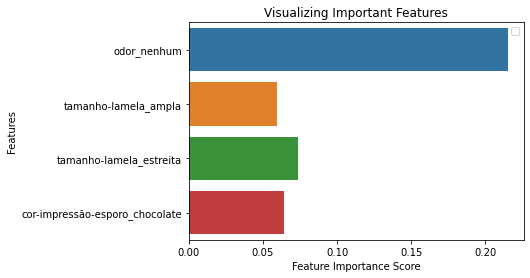

In [121]:
import seaborn as sns

sns.barplot(x=mais_imp_numero, y=mais_imp)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()